# Привет, коллега!

В течение четырех занятий нас ждет полное погружение, которое включает в себя:
1. Получение данных
2. Предобработка данных
3. Раздовательный анализ данных
4. Проверка гипотез
5. Формулирование выводов, рекомендаций и плана возможных действий для мнеджмента компании

#### Данные для задания можно скачать по ссылке: https://drive.google.com/file/d/1pCBXkKTE-Dqf2saOAwCIke08vcG6_voY/view?usp=sharing
#### Для выполнения задания тебе могут пригодится библиотеки:
(some **hint** 
1. import pandas as pd
2. import numpy as np 
3. import datetime
3. import sklearn )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Step_1_Uzum_Academy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3000 non-null   int64  
 1   id                     3000 non-null   float64
 2   date_created           3000 non-null   object 
 3   order_id               2992 non-null   float64
 4   city_name              2992 non-null   object 
 5   date_assembly_started  2810 non-null   object 
 6   work_place_id          2956 non-null   float64
 7   date_picked            2610 non-null   object 
 8   single_item            3000 non-null   bool   
 9   from_multi_stock_wave  3000 non-null   bool   
 10  dp_id                  2994 non-null   float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 216.9+ KB


Описание колонок в дата-фрейме:

1) id - уникальный ID записи
2) date_created - дата и время создания заказа
3) order_id - уникальный ID заказа
4) city_name - город заказа
5) date_assembly_started - дата и время начала сборки заказа
6) work_place_id - id места работника, который работает с заказом
7) date_picked - дата и время окончания отбора позиций заказа
8) single_item (булевое значение) - находится ли в заказе 1 товар в количестве 1 штука
9) from_multi_stock_wave (булевое значение) - собирается ли заказ с нескольких складов

Задача №1. Коллега прислал тебе данные для анализа: скачай данные, проверь количество колонок. Если присутствуют лишняя колонка (колонки) - их нужно удалить.

In [2]:
# ...some code here ....
df = df.drop(['Unnamed: 0','dp_id'],axis = 1)
df.columns

Index(['id', 'date_created', 'order_id', 'city_name', 'date_assembly_started',
       'work_place_id', 'date_picked', 'single_item', 'from_multi_stock_wave'],
      dtype='object')

Задача №2. Теперь необходимо проверить кол-во строк и кол-во непустых строк в дата-фрейме. Если в дата-фрейме в какой-либо колонке присутствуют пустые значения - можно удалить целую строку. 

In [3]:
# ...some code here ....
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2455 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2455 non-null   float64
 1   date_created           2455 non-null   object 
 2   order_id               2455 non-null   float64
 3   city_name              2455 non-null   object 
 4   date_assembly_started  2455 non-null   object 
 5   work_place_id          2455 non-null   float64
 6   date_picked            2455 non-null   object 
 7   single_item            2455 non-null   bool   
 8   from_multi_stock_wave  2455 non-null   bool   
dtypes: bool(2), float64(3), object(4)
memory usage: 158.2+ KB


Задача №3. 
Теперь, когда все готово, приступим к главному:
    Твой коллега скинул данные для того, чтобы ты, как аналитик, подсчитал, для какого города заказы собираются быстрее. 
    Таким образом:
    
1) Нужно сравнить date_created и date_assembly_started - сколько времени проходит от создания заказа до начала его сборки в среднем?
2) Нужно сравнить - сколько времени проходит от начала сборки до окончания отбора позиций в среднем?
3) Затем сравнить 2 полученные выше метрики по городам (для какого города время от создания заказа до начала сборки - минимальное? для какого города - максимальное? как бы ты объяснил - почему?)


In [4]:
# ... some code here ... 
df.head()

,id,date_created,order_id,city_name,date_assembly_started,work_place_id,date_picked,single_item,from_multi_stock_wave
0,131199.099109,2023-10-03 14:15:30.183690,154445.148978,"{""ru"": ""Бухара"", ""uz"": ""Buxoro""} Kuryerlik xiz...",2023-10-03 16:17:51.777480,123.0,2023-10-03 15:51:56.474616,False,False
1,65635.223942,2023-07-02 13:34:55.760787,77009.786410,"{""ru"": ""Ташкент"", ""uz"": ""Toshkent""} ТАШ-25",2023-07-02 15:38:54.143670,107.0,2023-07-02 15:03:36.372913,False,False
2,47216.631063,2023-05-30 12:55:31.324566,54323.211592,"{""ru"": ""Ташкент"", ""uz"": ""Toshkent""} ТАШ-41",2023-05-30 21:50:25.977527,109.0,2023-05-30 21:01:33.655621,False,False
3,66496.840504,2023-07-04 05:54:32.376455,78124.970832,"{""ru"": ""Шахрисабз"", ""uz"": ""Shahrisabz""} ШРЗ-1",2023-07-04 08:58:07.509438,128.0,2023-07-04 07:39:54.982416,False,False
4,3988.887114,2022-12-20 13:30:12.592720,3440.817729,"{""ru"": ""Маргилан"", ""uz"": ""Marg‘ilon""} МРГ-1",2022-12-20 15:25:54.385155,101.0,2022-12-20 14:08:37.492925,False,False


для начала надо раздробить колонку city_name на:
- city_name_ru
- city_name_uz
- place

In [5]:
df[['map','place']] = df['city_name'].apply(lambda x: pd.Series(str(x).split("} ")))
df['map'] = df['map'].apply(lambda x: x + '}')

In [6]:
import json

# преобразуем в обьект python
def try_parse_json(x):
    try:
        return json.loads(x)
    except json.JSONDecodeError:
        return {}

df['map'] = df['map'].apply(try_parse_json)

In [7]:
# вытаскиваем значения из словаря
df['city_name_ru'] = df['map'].apply(lambda x: x.get('ru', ''))
df['city_name_uz'] = df['map'].apply(lambda x: x.get('uz', ''))

# удаляем лишнее
df = df.drop(['map','city_name'],axis = 1)
df.dropna(inplace=True)

заметил ошибку в временных колонках, время в колонках должны быть в такой очередности:
1. date_created
2. date_assembly_started 
3. date_picked

но идут в такой очередности:
1. date_created
2. date_picked
3. date_assembly_started

Исправляем

In [8]:
# переименовываем
df.rename(columns={"date_assembly_started": "date_picked",
                   "date_picked": "date_assembly_started"})

# меняем местами в таблице(для удобства)
df['date_assembly_started'], df['date_picked'] = df['date_picked'] , df['date_assembly_started']

In [9]:
# избавляемся от наносекунд и преобразовывем к временному типу данных
df['date_assembly_started'] = pd.to_datetime(df['date_assembly_started']).astype('datetime64[s]')
df['date_picked'] =           pd.to_datetime(df['date_picked']).astype('datetime64[s]')
df['date_created'] =          pd.to_datetime(df['date_created']).astype('datetime64[s]')

In [10]:
df['assembly_start_delay'] = df['date_assembly_started'] - df['date_created']
a = df['assembly_start_delay'].mean()
print(f'среднее время от создания до начала сборки заказа: {a}')

df['assembly_duration'] = df['date_picked'] - df['date_assembly_started']
b = df['assembly_duration'].mean()
print(f'среднее время от начала сборки до окончания отбора позиции: {b}')


среднее время от создания до начала сборки заказа: 0 days 04:20:46
среднее время от начала сборки до окончания отбора позиции: 0 days 00:58:31


#### построим таблицу средних, для каждого города и укажем количество заказов(выберем 20 городов с наибольшими заказами)

In [11]:
result = (df.groupby('city_name_ru').agg({'assembly_start_delay': 'mean', 
                                          'assembly_duration':    'mean',
                                          'order_id':             'count'})
                                    .reset_index()
                                    .sort_values(by='order_id')
                                    .nlargest(20,columns=['order_id'])
                                    .rename(columns={'order_id':'count_order_id'}))

***(NEW)***
1. Время на один заказ по каждому городу (не совсем понял)
2. Сравнить это время
3. Индекс аффинитивности - это когда мы берем конкретное значение какого-то признака для конкретного наблюдения и делим, например, на среднее по всей генеральной совокупности.

In [12]:
# считаем разницу во времени среднее(общее) - среднее(по городу)
result['one_order_time_avg'] = result['assembly_start_delay'].mean() - result['assembly_start_delay']

# строим AFF для assembly_start_delay
result['AFF_delay'] = result['assembly_start_delay'] / result['assembly_start_delay'].mean() * - 100 + 200
result['AFF_delay'] = result['AFF_delay'].round(2)

# строим AFF для assembly_duration
result['AFF_duration'] = result['assembly_duration'] / result['assembly_duration'].mean() * - 100 + 200
result['AFF_duration'] = result['AFF_duration'].round(2)

- **AFF** = рейтинг по ***целевой*** аудитории / рейтинг по ***базовой*** аудитории * 100%
- выше **100%** ее **можно использовать**, **ниже** 100% **нецелесообразно**, **идеальный показатель** индекса соответствия в маркетинге — **200% и выше**

In [13]:
# посмотрев на AFF мы быстро можем понять рейтинг времени относительно среднего значений. где > 100 это хорошо, меньше это плохо
result.head(20).sort_values(by='AFF_delay',ascending=False)

,city_name_ru,assembly_start_delay,assembly_duration,count_order_id,one_order_time_avg,AFF_delay,AFF_duration
60,Шахрисабз,0 days 01:35:50,0 days 00:58:57,31,0 days 01:53:09,154.14,98.30
64,Янгиюль,0 days 02:05:38,0 days 00:58:23,24,0 days 01:23:21,139.88,99.28
46,Самарканд,0 days 02:16:44,0 days 00:53:05,154,0 days 01:12:15,134.57,108.42
17,Джизак,0 days 02:22:57,0 days 00:50:16,27,0 days 01:06:02,131.60,113.28
48,Термез,0 days 02:39:42,0 days 00:57:38,26,0 days 00:49:17,123.58,100.58
3,Ангрен,0 days 02:48:06,0 days 00:59:32,24,0 days 00:40:53,119.56,97.30
52,Фергана,0 days 02:50:03,0 days 00:59:59,110,0 days 00:38:56,118.63,96.52
28,Карши,0 days 02:50:41,0 days 01:02:05,63,0 days 00:38:18,118.33,92.90
9,Бухара,0 days 02:54:43,0 days 00:56:20,118,0 days 00:34:16,116.40,102.82
20,Зарафшан,0 days 03:03:09,0 days 00:53:31,32,0 days 00:25:50,112.36,107.68


***(NEW)*** **Тест - как сравнить средние при ненормальном распределении:** 
1. Манна-Уитни тест
2. Постараться привести к нормальному распределению:
    - Привести численный признак к логнормальному распределению
3. Очистить выбросы = > посмотреть еще раз

In [14]:
# создание таблицы town_assembly
town_assembly = (pd.pivot_table(df,
                                  index=['city_name_ru', 'place'],
                                  values=['assembly_start_delay', 'order_id'],  # Включаем столбец 'id'
                                  aggfunc={'assembly_start_delay': 'mean', 'order_id': 'count'})
                   .rename(columns={'order_id':'count_order_id'})
                   .sort_values(by='city_name_ru').reset_index())

In [15]:
# Тест Манна-Уитни на количество заказов разных городов
from scipy.stats import mannwhitneyu

# выбрать два города любых
sample1 = town_assembly[town_assembly['city_name_ru'] == 'Ангрен']['count_order_id']
sample2 = town_assembly[town_assembly['city_name_ru'] == 'Ташкент']['count_order_id']

# тест Манна-Уитни
statistic, p_value = mannwhitneyu(sample1, sample2)

# Вывод результатов
print(f"Статистика теста U: {statistic}")
print(f"P-value: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия.")
else:
    print("Нет оснований отвергать нулевую гипотезу: различия не являются статистически значимыми.")


Статистика теста U: 139.0
P-value: 0.7744432534054957
Нет оснований отвергать нулевую гипотезу: различия не являются статистически значимыми.


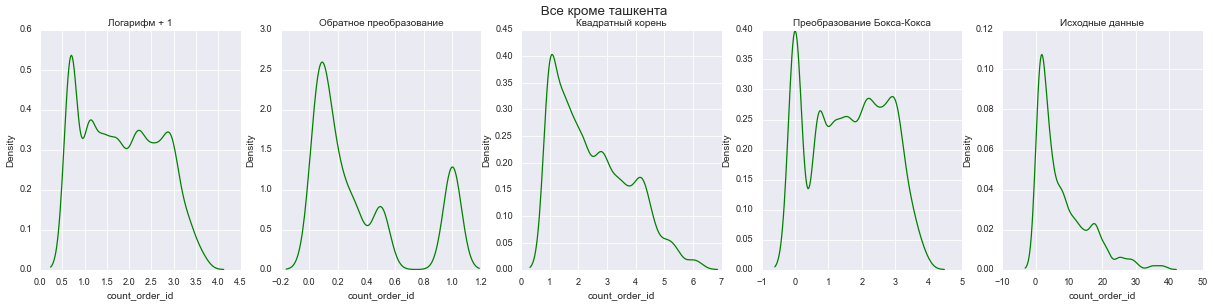

In [29]:
from scipy.stats import boxcox
# Все города кроме ташкента на визуальное определение распределения
all_cities = town_assembly[town_assembly['city_name_ru'] != 'Ташкент']['count_order_id']

# Преобразование квадратным корнем
transformed_sqrt_all = np.sqrt(all_cities)
# Логарифмическое преобразование
log_n1p_all = np.log1p(all_cities)
# Обратное преобразование
transformed_inverse_all = 1 / all_cities
# Преобразование Бокса-Кокса
transformed_boxcox_all, _ = boxcox(all_cities)

# Создание подграфиков
plt.style.use('classic')
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5),dpi=60)
plt.suptitle(' Все кроме ташкента', fontsize=16)

# Логарифм + 1
sns.kdeplot(log_n1p_all, color='green', ax=axes[0],bw_adjust=0.5)
axes[0].set_title('Логарифм + 1')

# Обратное преобразование
sns.kdeplot(transformed_inverse_all, color='green', ax=axes[1],bw_adjust=0.5)
axes[1].set_title('Обратное преобразование')

# Квадратный корень
sns.kdeplot(transformed_sqrt_all, color='green', ax=axes[2],bw_adjust=0.5)
axes[2].set_title('Квадратный корень')

# Преобразование Бокса-Кокса
sns.kdeplot(transformed_boxcox_all,color='green', ax=axes[3],bw_adjust=0.5)
axes[3].set_title('Преобразование Бокса-Кокса')

# Исходные данные
sns.kdeplot(all_cities, color='green',ax=axes[4],bw_adjust=0.5)
axes[4].set_title('Исходные данные')

plt.show()


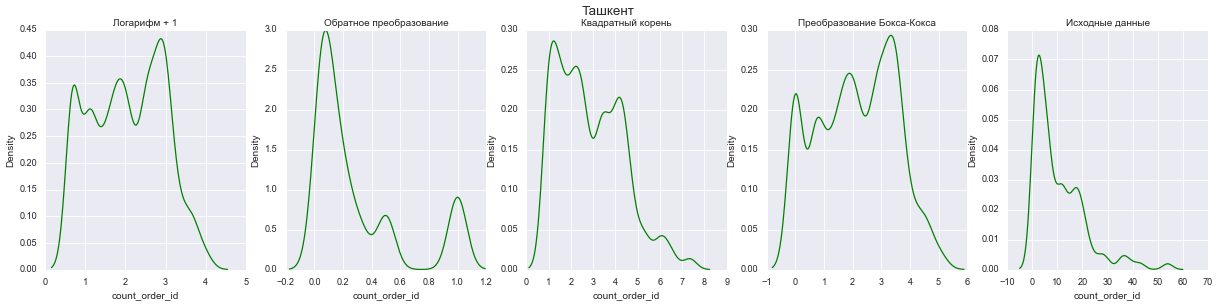

In [31]:
# Ташкент на визуальное определение распределения
tash = town_assembly[town_assembly['city_name_ru'] == 'Ташкент']['count_order_id']

# Преобразование квадратным корнем
transformed_sqrt = np.sqrt(tash)
# Логарифмическое преобразование
lg_tash = np.log1p(tash)
# Обратное преобразование
transformed_inverse = 1 / tash
# Преобразование Бокса-Кокса
transformed_boxcox, _ = boxcox(tash)

# Создание подграфиков
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5),dpi=60)
plt.suptitle('Ташкент', fontsize=16)

# Логарифм + 1
#sns.histplot(lg_tash, kde=True ,color='green', ax=axes[0])
sns.kdeplot(lg_tash, color='green',ax=axes[0],bw_adjust=0.5)
axes[0].set_title('Логарифм + 1')

# Обратное преобразование
#sns.histplot(transformed_inverse, kde=True ,color='green', ax=axes[1])
sns.kdeplot(transformed_inverse, color='green',ax=axes[1],bw_adjust=0.5)
axes[1].set_title('Обратное преобразование')

# Квадратный корень
#sns.histplot(transformed_sqrt, kde=True ,color='green', ax=axes[2])
sns.kdeplot(transformed_sqrt, color='green',ax=axes[2],bw_adjust=0.5)
axes[2].set_title('Квадратный корень')

# Преобразование Бокса-Кокса

#sns.histplot(transformed_boxcox, kde=True ,color='green', ax=axes[3])
sns.kdeplot(transformed_boxcox, color='green',ax=axes[3],bw_adjust=0.5)
axes[3].set_title('Преобразование Бокса-Кокса')

# Исходные данные
sns.kdeplot(tash, color='green',ax=axes[4],bw_adjust=0.5)
#sns.histplot(tash, color='green',kde=True ,ax=axes[4])
axes[4].set_title('Исходные данные')


plt.show()


- **Визуально можем заметить что преобразование квадратного корня дает хороший результат в центре, что важно, и точки не сильно откланяются от прямой на концах(Ташкент и другие города)**

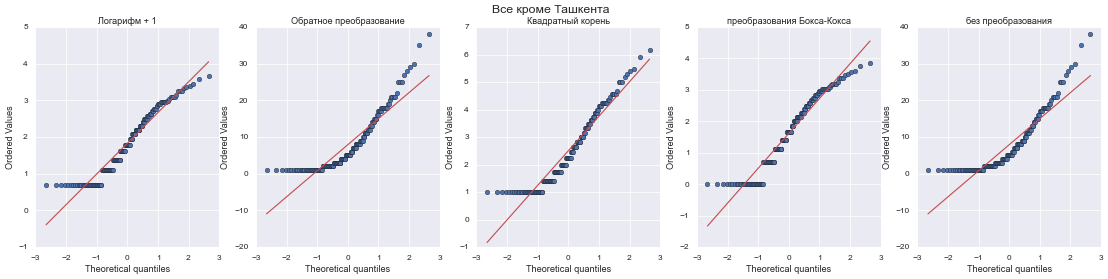

In [32]:
#qq графики для преобразований числового признака всех городов кроме Ташкента
from scipy.stats import probplot
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5),dpi=55)
plt.suptitle('Все кроме Ташкента', fontsize=16)
# Q-Q plot для лог + 1
probplot(log_n1p_all, plot=axes[0], dist='norm', fit=True)
axes[0].set_title('Логарифм + 1')

# Q-Q plot Обратное преобразование
probplot(1 / transformed_inverse_all, plot=axes[1], dist='norm', fit=True)
axes[1].set_title('Обратное преобразование')

# Q-Q plot Квадратный корень
probplot(transformed_sqrt_all, plot=axes[2], dist='norm', fit=True)
axes[2].set_title('Квадратный корень')

# Q-Q plot Преобразование Бокса-Кокса
probplot(transformed_boxcox_all, plot=axes[3], dist='norm', fit=True)
axes[3].set_title('преобразования Бокса-Кокса')

# Q-Q plot Преобразование Бокса-Кокса
probplot(all_cities, plot=axes[4], dist='norm', fit=True)
axes[4].set_title('без преобразования')
plt.show()


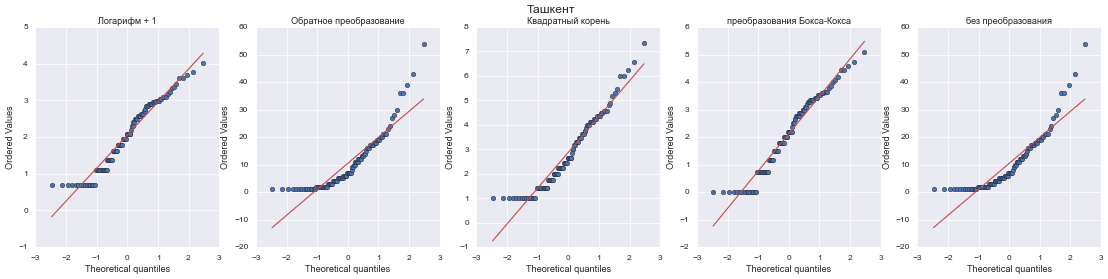

In [33]:
#qq графики для преобразований числового признака Ташкента
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5),dpi=55)
plt.suptitle('Ташкент', fontsize=16)
# Q-Q plot для лог + 1
probplot(lg_tash, plot=axes[0], dist='norm', fit=True)
axes[0].set_title('Логарифм + 1')

# Q-Q plot Обратное преобразование
probplot(1 / transformed_inverse, plot=axes[1], dist='norm', fit=True)
axes[1].set_title('Обратное преобразование')

# Q-Q plot Квадратный корень
probplot(transformed_sqrt, plot=axes[2], dist='norm', fit=True)
axes[2].set_title('Квадратный корень')

# Q-Q plot Преобразование Бокса-Кокса
probplot(transformed_boxcox, plot=axes[3], dist='norm', fit=True)
axes[3].set_title('преобразования Бокса-Кокса')

# Q-Q plot Преобразование Бокса-Кокса
probplot(tash, plot=axes[4], dist='norm', fit=True)
axes[4].set_title('без преобразования')
plt.show()

### Убираем выбросы (крайние значения -> отталкиваясь от графика QQ)

In [34]:
# Преобразуем данные
town_assembly['count_order_id'] = np.sqrt(town_assembly['count_order_id'])

In [35]:
# избавляемся от выбросов, замена переменной
town_assembly_filtered = (town_assembly[(town_assembly['count_order_id'] > 2.6)
                                      & (town_assembly['count_order_id'] < 5.5)])


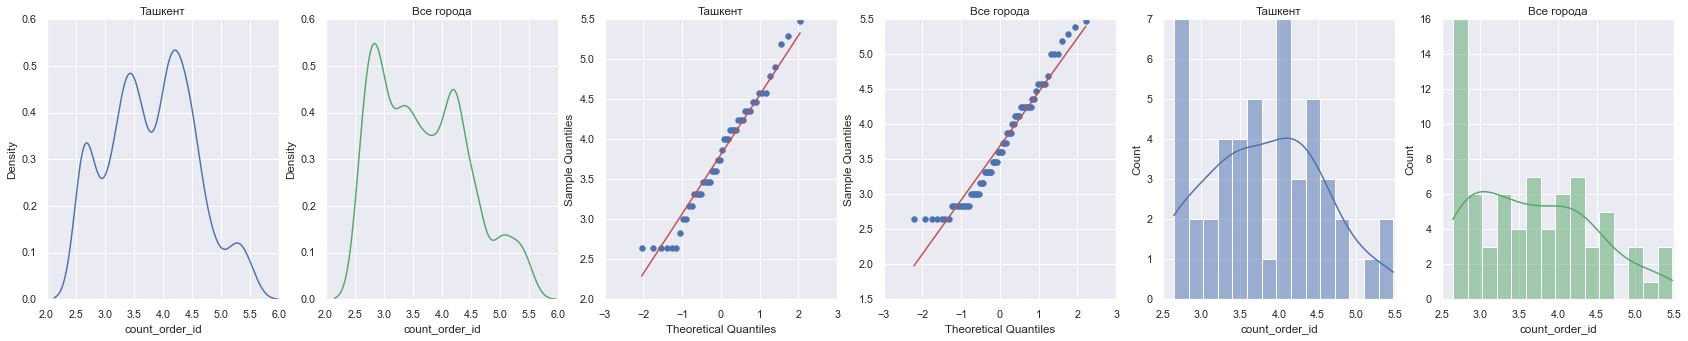

In [37]:
# смотрим изменения
# определяем переменные
t = town_assembly_filtered[town_assembly_filtered['city_name_ru'] == 'Ташкент']['count_order_id']
all_cit = town_assembly_filtered[town_assembly_filtered['city_name_ru'] != 'Ташкент']['count_order_id']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30, 5), dpi=70)

sns.kdeplot(data= t, clip  = [0,6], bw_adjust=0.5, ax=axes[0])
axes[0].set_title('Ташкент')
sns.kdeplot(data= all_cit, clip  = [0,6], bw_adjust=0.5,color='g', ax=axes[1])
axes[1].set_title('Все города')

# Построение Q-Q графика для Ташкента
sm.qqplot(t, line='s', ax=axes[2])  # line='s' для отображения линии соответствия нормальному распределению
axes[2].set_title('Ташкент')

# Построение Q-Q графика для всех городов кроме Ташкента
sm.qqplot(all_cit, line='s', ax=axes[3])
axes[3].set_title('Все города')

# Построение графика плотности распределния Ташкента
sns.histplot(data=t, bins=15, kde=True, ax=axes[4])
axes[4].set_title('Ташкент')

# Построение графика плотности распределния для всех городов кроме Ташкента
sns.histplot(data=all_cit, bins=15, kde=True,color='g',  ax=axes[5])
axes[5].set_title('Все города')

plt.show();

Задача №4. Ты подсчитал среднее время сборки заказа по городам и в целом, однако теперь хочется понять являются ли результаты значимыми. 

1) Проверь распредение сборки заказов в целом (без разделения по городам) - является ли распределение нормальным?
2) Проверь распредение сборки заказов для самого медленного города и для самого быстрого. Являются ли оба эти распределения нормальным?
3) Построй графики плотности распределений и box-plots. Что говорят данные? Как бы ты их интерпретировал? 
5) Проведи 2 статистических теста для проверки нормальности (на выбор) по два теста - на каждый город. О чем говорят метрики? О чем говорит p.value? 
6) Сравни 2 города (самый быстрый и самый медленный), используя параметрический или непараметрический критерий сравнения (в зависимости от пункта 5). 
7) Сделай вывод, относительно результата. 



In [ ]:
# ...some code here ...

***(NEW)***
1. Объяснить графики плтности распределений без Ташкента и взять ташкент отдельно
2. Построить тренд: тангенс угла наклона прямой в положительном направлении оси OX
3. Постараться объединить города на основе какого-либо признака (признаков)
4. Распределить города по произвольному кол-ву признаку. Почитать RFM-анализа (аналог)
5. Распределить города по произвольному кол-ву признаков с помощью кластерного анализа (k-means)

In [39]:
df.head()

,id,date_created,order_id,date_assembly_started,work_place_id,date_picked,single_item,from_multi_stock_wave,place,city_name_ru,city_name_uz,assembly_start_delay,assembly_duration
0,131199.099109,2023-10-03 14:15:30,154445.148978,2023-10-03 15:51:56,123.0,2023-10-03 16:17:51,False,False,Kuryerlik xizmati,Бухара,Buxoro,0 days 01:36:26,0 days 00:25:55
1,65635.223942,2023-07-02 13:34:55,77009.786410,2023-07-02 15:03:36,107.0,2023-07-02 15:38:54,False,False,ТАШ-25,Ташкент,Toshkent,0 days 01:28:41,0 days 00:35:18
2,47216.631063,2023-05-30 12:55:31,54323.211592,2023-05-30 21:01:33,109.0,2023-05-30 21:50:25,False,False,ТАШ-41,Ташкент,Toshkent,0 days 08:06:02,0 days 00:48:52
3,66496.840504,2023-07-04 05:54:32,78124.970832,2023-07-04 07:39:54,128.0,2023-07-04 08:58:07,False,False,ШРЗ-1,Шахрисабз,Shahrisabz,0 days 01:45:22,0 days 01:18:13
4,3988.887114,2022-12-20 13:30:12,3440.817729,2022-12-20 14:08:37,101.0,2022-12-20 15:25:54,False,False,МРГ-1,Маргилан,Marg‘ilon,0 days 00:38:25,0 days 01:17:17


In [38]:
# определяем переменные, дата начала сборки
all_cities = df[df['city_name_ru'] != 'Ташкент']['date_assembly_started']
tash =       df[df['city_name_ru'] == 'Ташкент']['date_assembly_started']

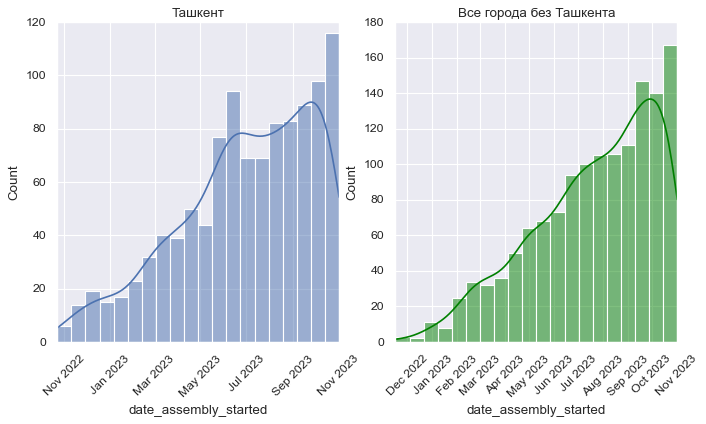

In [ ]:
# (NEW)Построение плотности распределения Ташкента и без
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=80)

sns.histplot(data=tash, bins=20, kde=True, ax=axes[0])
axes[0].set_title('Ташкент')
axes[0].tick_params(axis='x', rotation=45)  # Используйте tick_params для поворота меток по x

sns.histplot(data=all_cities, bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Все города без Ташкента')
axes[1].tick_params(axis='x', rotation=45)  # Используйте tick_params для поворота меток по x

plt.show()

Для Ташкента:
Коэффициент наклона (slope): 592.4092681041386
Пересечение (intercept): -60260.742402742515

Для всех городов (кроме Ташкента):
Коэффициент наклона (slope): 668.9694044145689
Пересечение (intercept): -65283.329791715354


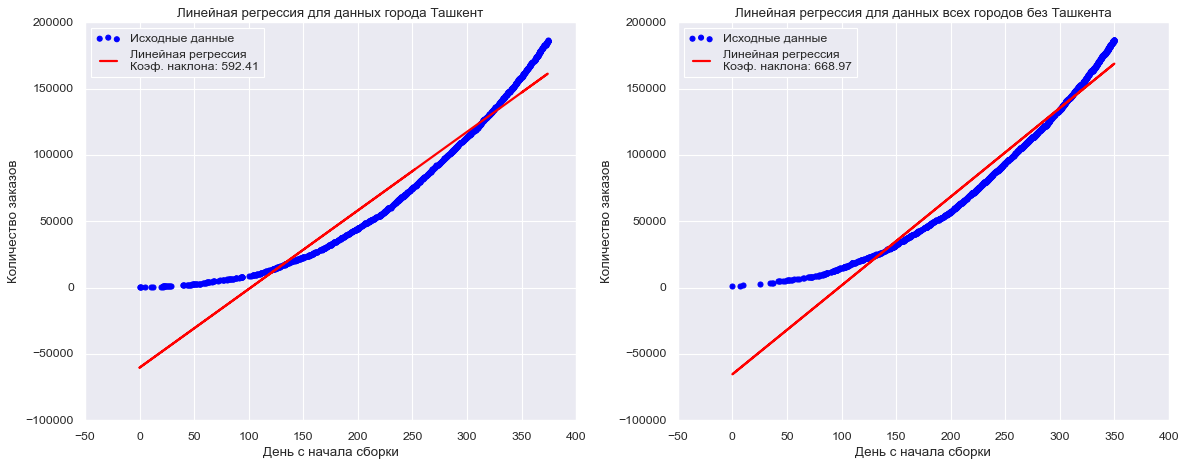

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Преобразование даты в числа (дни с начала наблюдений) для Ташкента
tashkent_df = df[df['city_name_ru'] == 'Ташкент'].copy()
tashkent_df['day'] = (tashkent_df['date_assembly_started'] - tashkent_df['date_assembly_started'].min()).dt.days

# Определение независимой и зависимой переменных для Ташкента
X_tash = tashkent_df['day'].values.reshape(-1, 1)
y_tash = tashkent_df['order_id']

# Создание и обучение модели линейной регрессии для Ташкента
model_tash = LinearRegression()
model_tash.fit(X_tash, y_tash)

# Вывод коэффициентов регрессии для Ташкента
print("Для Ташкента:")
print(f"Коэффициент наклона (slope): {model_tash.coef_[0]}")
print(f"Пересечение (intercept): {model_tash.intercept_}")

#для всех городов, кроме Ташкента
all_df = df[df['city_name_ru'] != 'Ташкент'].copy()
all_df['day'] = (all_df['date_assembly_started'] - all_df['date_assembly_started'].min()).dt.days


X_all = all_df['day'].values.reshape(-1, 1)
y_all = all_df['order_id']


model_all = LinearRegression()
model_all.fit(X_all, y_all)


print("\nДля всех городов (кроме Ташкента):")
print(f"Коэффициент наклона (slope): {model_all.coef_[0]}")
print(f"Пересечение (intercept): {model_all.intercept_}")

# Построение графиков регрессии
plt.figure(figsize=(15, 6))

# функция легенды
def set_legend_top_left(ax):
    ax.legend(loc='upper left')

# Построение графика для Ташкента
plt.subplot(1, 2, 1)
plt.scatter(X_tash, y_tash, color='blue', label='Исходные данные')
plt.plot(X_tash, model_tash.predict(X_tash), color='red', label=f'Линейная регрессия\nКоэф. наклона: {model_tash.coef_[0]:.2f}', linewidth=2)
plt.title('Линейная регрессия для данных города Ташкент')
plt.xlabel('День с начала сборки')
plt.ylabel('Количество заказов')
set_legend_top_left(plt.gca())  # переместить легенду в левый верхний угол

# Построение графика для всех городов (кроме Ташкента)
plt.subplot(1, 2, 2)
plt.scatter(X_all, y_all, color='blue', label='Исходные данные')
plt.plot(X_all, model_all.predict(X_all), color='red', label=f'Линейная регрессия\nКоэф. наклона: {model_all.coef_[0]:.2f}', linewidth=2)
plt.title('Линейная регрессия для данных всех городов без Ташкента')
plt.xlabel('День с начала сборки')
plt.ylabel('Количество заказов')
set_legend_top_left(plt.gca()) 
plt.tight_layout()
plt.show()


### ТУТ ЗАКАНЧИВАЕТСЯ

--------------------------------------------------------------------

- (доделать)
3. Постараться объединить города на основе какого-либо признака (признаков)
4. Распределить города по произвольному кол-ву признаку. Почитать RFM-анализа (аналог)
5. Распределить города по произвольному кол-ву признаков с помощью кластерного анализа (k-means)

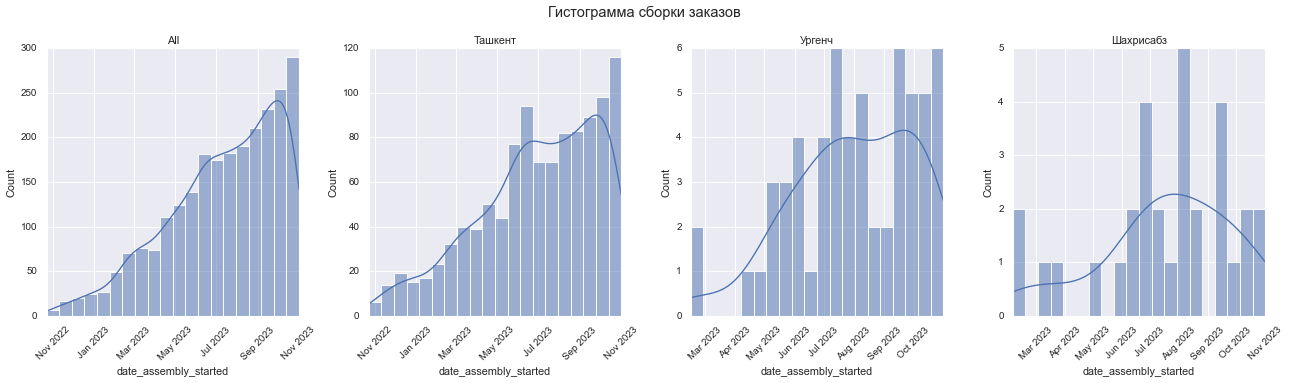

In [ ]:
# (OLD)Выберите только интересующие вас города
cities = ['All','Ташкент', 'Ургенч', 'Шахрисабз']

# Создайте 4 отдельных гистограммных графика
plt.figure(figsize=(20, 6), dpi=65)
plt.suptitle('Гистограмма сборки заказов', fontsize=16)

for i, city in enumerate(cities, start=1):
    plt.subplot(1, 4, i)
    if city == 'All':
        data = df['date_assembly_started']
    else:
        data = df[df['city_name_ru'] == city]['date_assembly_started']
        
# Добавьте проверку на наличие данных
    if not data.empty:
        sns.histplot(data, bins=20, kde=True)
        plt.title(city)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
all_cities = df[df['city_name_ru'] != 'Ташкент']['date_assembly_started']
tash =  df[df['city_name_ru'] == 'Ташкент']['date_assembly_started']

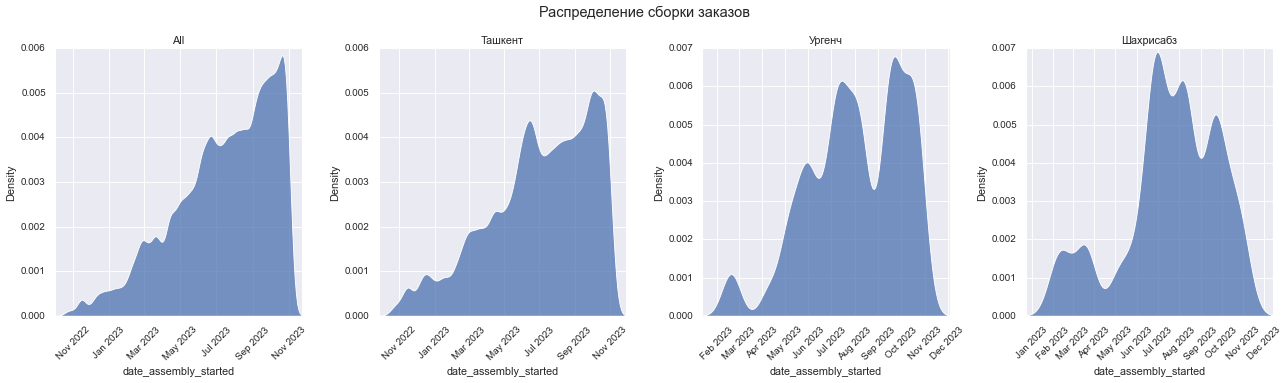

In [ ]:
# (OLD)Города, для которых вы хотите построить графики
cities = ['All','Ташкент', 'Ургенч', 'Шахрисабз']

plt.figure(figsize=(20, 6), dpi=65)
plt.suptitle('Распределение сборки заказов', fontsize=16)

for i, city in enumerate(cities, start=1):
    plt.subplot(1, 4, i)
    if city == 'All':
        data = df['date_assembly_started']
    else:
        data = df[df['city_name_ru'] == city]['date_assembly_started']
    
    # Добавьте проверку на наличие данных
    if not data.empty:
        sns.kdeplot(data, bw_adjust=0.4, multiple="stack")
        plt.title(city)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Начало отсчета началось в ноябре 2022 года(Ташкент), но в городах (slow) и (fast) только с марта 2023
- Общая медиана июль, в slow и fast август(позже старт позже медиана)
- большинство сборов заказов приходится на июнь-сентябрь
- Верхие усы короче, это говорит что за 2 последних месяца заказов столько же сколько 5-6 месяцев было со старта

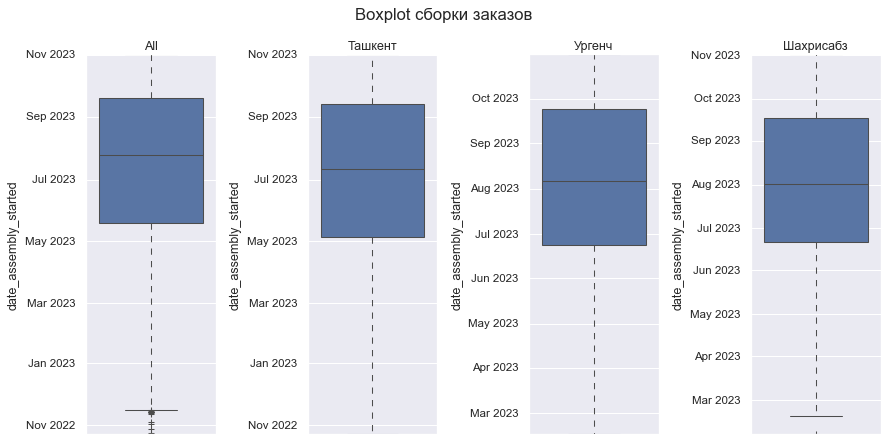

In [ ]:
# Ургенч(slow), Шахрисабз(fast)
cities = ['All','Ташкент', 'Ургенч', 'Шахрисабз']

plt.figure(figsize=(12, 6), dpi=75)
plt.suptitle('Boxplot сборки заказов', fontsize=16)

for i, city in enumerate(cities, start=1):
    plt.subplot(1, 4, i)
    
    if city == 'All':
        data = df['date_assembly_started']
    else:
        data = df[df['city_name_ru'] == city]['date_assembly_started']
    
    # проверка на наличие данных
    if not data.empty:
        sns.boxplot(data=data)
        plt.title(city)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#1. Постараться подумать, как сравнивать средние: какие методы есть, какие ограничения, что конкретно сравнивается. 
#2. Таким образмом пайплайн для сравнения средних:
# 1. Проверить распределения
# 2. Обосновать выбор статистического критерия (т-тест / манна-уитни / другой (можно посмотреть про бустрэп))
# 3. Прочитать / понять, как простыми словами можно интерпретировать статистику теста? Как интерпретировать p.value, как интерпретировать конечный результат
# 4. Почитать о механике теста.
# 5. ЦПТ - почитать и понимать основной смысл. = > я скину. 

In [ ]:
df['assembly_start_delay_seconds'] = df['assembly_start_delay'].dt.total_seconds()

In [ ]:
from scipy.stats import anderson,shapiro

# у меня выдавало ошибку типа данных при тесте используя assembly_start_delay(timedelta64[s]) - диапазон
# поэтому я преобразовал
df['assembly_start_delay_seconds'] = df['assembly_start_delay'].dt.total_seconds()

data_urgench = df[df['city_name_ru'] == 'Ургенч']['assembly_start_delay_seconds']
data_shahrisabz = df[df['city_name_ru'] == 'Шахрисабз']['assembly_start_delay_seconds']

# тест Андерсона-Дарлинга
result_urgench = anderson(data_urgench)
print(f"Тест Андерсона-Дарлинга для Ургенч: statistic = {result_urgench.statistic}, критические значения = {result_urgench.critical_values}, уровень значимости = {result_urgench.significance_level}")

result_shahrisabz = anderson(data_shahrisabz)
print(f"Тест Андерсона-Дарлинга для Шахрисабз: statistic = {result_shahrisabz.statistic}, критические значения = {result_shahrisabz.critical_values}, уровень значимости = {result_shahrisabz.significance_level}")

# тест Шапиро-Уилка
stat_urgench, p_urgench = shapiro(data_urgench)
print(f"Тест Шапиро-Уилка для Ургенч: statistic = {stat_urgench}, p-value = {p_urgench}")

stat_shahrisabz, p_shahrisabz = shapiro(data_shahrisabz)
print(f"Тест Шапиро-Уилка для Шахрисабз: statistic = {stat_shahrisabz}, p-value = {p_shahrisabz}")

Statistic (статистика) равна 2.39 и 1.3. Сравнивая с критическими значениями, stat превышает их, данные не являются нормально распределенными
Маленькое p-value указывает на то, что данные не соответствуют нормальному распределению

In [ ]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(data_urgench, data_shahrisabz)

if p_value < 0.05:
    print(f"Существует статистически значимая разница. p-value = {p_value}")
else:
    print("Статистически значимой разницы не выявлено.")

- **Существует статистически значимая разница во времени сборки заказов между городами Ургенч и Шахрисабз.**
- **Город Ургенч имеет более длительное время сборки заказов по сравнению с Шахрисабз.**

Задача №5. Полученные результаты ты показал коллеге. Он поблагодарил тебя за работу, посмотрел результаты, но вдруг ему в голову пришла гипотеза - а что если на время сборки заказа влияет кол-во заказов на складе в этот день? И действительно! Вероятно, что чем больше заказов было создано в конкретный день, тем медленнее их будут собирать. Ты вызвался проверить эту гипотезу.

Таким образом:

1) Сформируй дата-фрейм, где будет: кол-во заказов (можно брать count по order_id), дата (можно взять дату создания заказа) и среднее время сборки заказа в эту дату. 
2) Построй корреляцию между кол-вом заказов и среднем временем сборки в этот день
3) Построй линейную регрессию для этих же признаков, где зависимая переменная - среднее время сборки заказа. 
4) О чем говорят данные? Что говорят метрики корреляции? Что говорят статистики регрессии? Как бы ты поделился результатом с коллегой, который не очень хорош в математике? 

In [ ]:
# ... some code here ... 

In [ ]:
final_df = pd.pivot_table(df, index=df['date_assembly_started'].dt.date,
                   values=['order_id','assembly_start_delay_seconds'],
                   aggfunc={'order_id':'count','assembly_start_delay_seconds': 'mean'}).rename(columns={'order_id':'count_order_id'}).sort_values(by='assembly_start_delay_seconds').reset_index()

In [ ]:
final_df['assembly_start_delay_seconds'] = final_df['assembly_start_delay_seconds'].round(0).astype('int32')
final_df['assembly_start_delay_hours'] = round(final_df['assembly_start_delay_seconds'] / 3600,2)
final_df = final_df.drop('assembly_start_delay_seconds',axis = 1)

In [ ]:
# часы в десятичном формате
final_df

In [ ]:
corr_value = final_df['assembly_start_delay_hours'].corr(final_df['count_order_id']).round(2)
print(f'Коэфициент корреляции: {corr_value}')

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Определение независимой и зависимой переменных
X = final_df[['count_order_id']]
y = final_df['assembly_start_delay_hours']

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов регрессии
print(f"Коэффициент наклона (slope): {model.coef_[0]}")
print(f"Пересечение (intercept): {model.intercept_}")

# Построение графика регрессии
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Количество заказов')
plt.ylabel('Среднее время сборки заказа')
plt.show()

#1. После проверки на нормальность - нужно было постараться привести данные к нормальному распределению (почистить выбросы, к логнормальонму привести)
#2. Разделить на группу (например, просто убрать Ташкент и считать его отдельно)
#3. Постараться регрессию вышего порядка.
#4. R2 - почитать и посмотреть, что это такое. 

In [ ]:
#1. Для всего, где выводится rank и список городов (по времени, по кол-ву заказов) - посчитать индекс аффинитивности относительно среднего
#2. Для подсчета средних статистик - необходимо их нормировать и считать среднее кол-во времени, например, в разрезе 1 заказа.
#3. Для всего где сравниваются средние, провести тест(ы) на нормальность и затем проверить соответствующим критерием (манна-уитни или т-тест)
#4. ЦПТ - скинуть материал. Также скинуть про p.value, критические значения (тестов).
#5. Для каждого города сформировать некоторое кол-во признаков для сегментации.
#6. Сгруппировать города по произвольному кол-ву признаков, полученных из пункта 5.
#7. Прочитать про RFM-анализ и k-means. - скину. 
#8. Завести гит

- Коэффициент корреляции равен 0.13: **есть минимальная связь, что при увелечении заказов растет время сборки. не стоит на этом акцентировать**
- Коэффициент наклона равен 0.07 * 60(минут) = 4.2 минуты: **то есть с увелечением количества заказа на 1, время сборки растет в среднем на 4 минуты**
- Пересечение равно 3.6 что составляет минимальное время сбора первого заказа: **в среднем уходит 3 с половиной часа, чтобы оформить первый заказ после паузы.**
- Так же точки разбросаны, нелинейно: **1 заказ может собираться от нескольких минут до 10 часов**

In [ ]:
# Ниже представлдены задачи для организации финального ноутбука
## 1. Для всех колонок и всех нужных группировок (по городам, по кол-ву заказов, по кол-ву сотрудников и тп) - представлены распределения и box-plots.
## 2. Для всех количественных признаков посчитаны выбросы и значения заменены средним:  (почитать об этом - тут: https://www.statology.org/remove-outliers-python/) 
## 3. Для всех городов, где мы что-то сравниваем, считаем индекс-аффинитивности: https://www.unisender.com/ru/glossary/chto-takoe-affiniti-indeks/#anchor-1
## 4. ЦПТ - более простого объяснения не нашел:https://cutt.ly/6wTcySD5
## 5. Признаки для сегментации - любые. Если не будет идей - можем оставить на потом, сделаем вместе с live кодингом
## 6. Сгруппировать города: код тут - https://www.datacamp.com/tutorial/k-means-clustering-python, почитать про k-means - тут: https://eldf.ru/top10ml/?utm_campaign=TOF&utm_medium=paid&utm_source=facebook&utm_term=text1&utm_content=img2&fbclid=IwAR2gPnD8FN8Mp2fSWc7PLrZEEQQj_ykAUvDkxt1lvFUyfygcmc1VFZnAkGA и тут: https://datascience.eu/ru/%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%BA-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B0-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD/ (мб где-то еще, но это - базовая информация)
## 7. RFM-анализ https://www.unisender.com/ru/blog/idei/rfm-analiz/

- Главная задача на эту неделю - сформировать все, что получится из пунктов выше и прочитать, если будет. 
- В субботу 11.11.2023 - мы будем заниматься лайвкодингом. Организуем все полученные знания в единый, понятный и логичный ноутбук. 